# import libraries

In [15]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer

# intuition

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


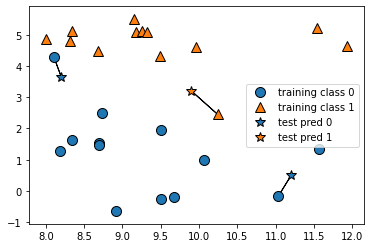

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


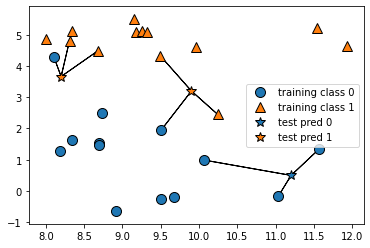

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # check this graph put, the top left test data class changed

# Applying KNN

In [12]:
X , y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test =  train_test_split(X,y,random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
#fitting the classifier with the training data
clf.fit(X_train, y_train)
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


# whats the accuracy?

In [13]:
print("Test set accuracy:",clf.score(X_test,y_test))

Test set accuracy: 0.8571428571428571


# Analysis of KNN

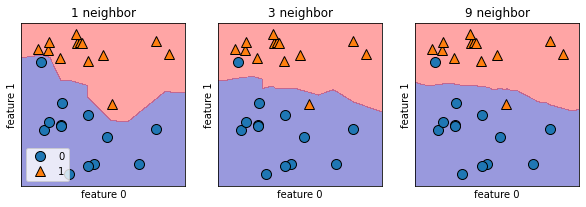

In [14]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors ,ax in zip([1,3,9],axes):
    clf =KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps= 0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

# can we confirm the connection between model complexity nd generlization of models?

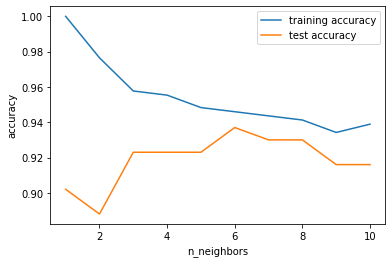

In [16]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label = "training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()